In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import math
from matplotlib import animation
%matplotlib notebook

# x = np.linspace(-40,40,200)
# plt.plot(x, U_exact(x,0,1,5))

def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val


dir0 = 0.0  # u(0,t)= dir0
dir1 = 0.0  # u(1,t)= dir1
#  function for setting initial conditions in space

def I(x,sig,S): # initial u(x,0)
    M = np.size(x)
    if S == 0:
        i_x = ddf(x,sig)
    else:    
        i_x = np.zeros_like(x)
    return i_x

def U_exact(x,t,sig,v,D):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = ddf(x,sig)
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t*D))/np.sqrt(4*np.pi*t*D)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

def U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D,S):

    Nt_points = Nt_gaps + 1
    h = T/(Nt_points)  # time step

    t = np.linspace(0.,T,Nt_points)  # times at each time step
    Nx_points = Nx_spaces + 1 
    x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
    dx = x_pde[1] - x_pde[0] 
    dt = t[1] - t[0]

    # Setting B, C and v for the numerical soultions
    C = D*dt/(dx**2)
    B = v*dt/(dx*2)
    U = np.zeros((Nx_points,Nt_points))
    
    U[:,0]=I(x_pde,sig,S)
    # enforcing the boundary condition
    U[-L,:]  = dir0 
    U[L,:] = dir1

    u_old = I(x_pde,sig,S)

    u = np.zeros(Nx_points)
    # and to store the full solution
    U = np.zeros((Nx_points,Nt_points))
    U[:,0] = u_old
    if S == 0:
        for n in range(1, Nt_points):  
            # set Dirichlet boundary points here
            #...
            # compute u at inner mesh points
            for i in range(1, Nx_spaces):
                u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])

            # update u_old before next step
            u_old[:]= u

            # copy into full storage
            U[:,n] = u;
    else:
        for n in range(1, Nt_points):  
            # set Dirichlet boundary points here
            #...
            # compute u at inner mesh points
            for i in range(1, Nx_spaces):
                if i == (Nx_points-1)/2:
                    u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])+1/20000
                else:
                    u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])

            # update u_old before next step
            u_old[:]= u

            # copy into full storage
            U[:,n] = u;
    
    return U

def plotting(U,L,sig,T,Nt_gaps,Nx_spaces, v,D):
    size_t = np.size(U,1)-1 # number of time steps
    t = np.linspace(0.,T,Nt_gaps-1)
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    markers =['X','.','+','o']

    colours = ['r','c','b','orange','m'] # make comparison easy
    colour_pos = 0;
    x_pde = np.linspace(-L, L, Nx_spaces+1)
    N_dots = 20
    x_dots = np.linspace(-L, L, N_dots+1)    # spacial points to plot exact solution at

# some arbitarily chosen time points to compare at
    for plot_pos in [0, round(size_t/10), round(size_t/5), round(size_t/2), round(size_t-2)]:

    # numerical solution
        label = "t=" + "%0.3f" % (round(t[plot_pos]),)
        ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    

    plt.xlim(-L,L) # zoom in on area of interest
    ax.legend(loc='upper left',fontsize = 7)
    ax.set(xlabel = 'Space (km)', ylabel = 'Concentration (Kg/km^3)', title = 'Numerical solution')
    plt.show()

In [98]:
Nt_gaps,T,Nx_spaces,L,v,I,sig,D,S = 20000, 10000, 1000, 100, 0.0067056, I, 1,0.000864,1
#T = 5000s, L = 40km,, v=0.0067056km/s = 15mi/h, D= 0.000864km^2/s=0.24cm^2/s 
U = U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D,S)
U_at_70 = np.amax(U[:, -1])

<IPython.core.display.Javascript object>


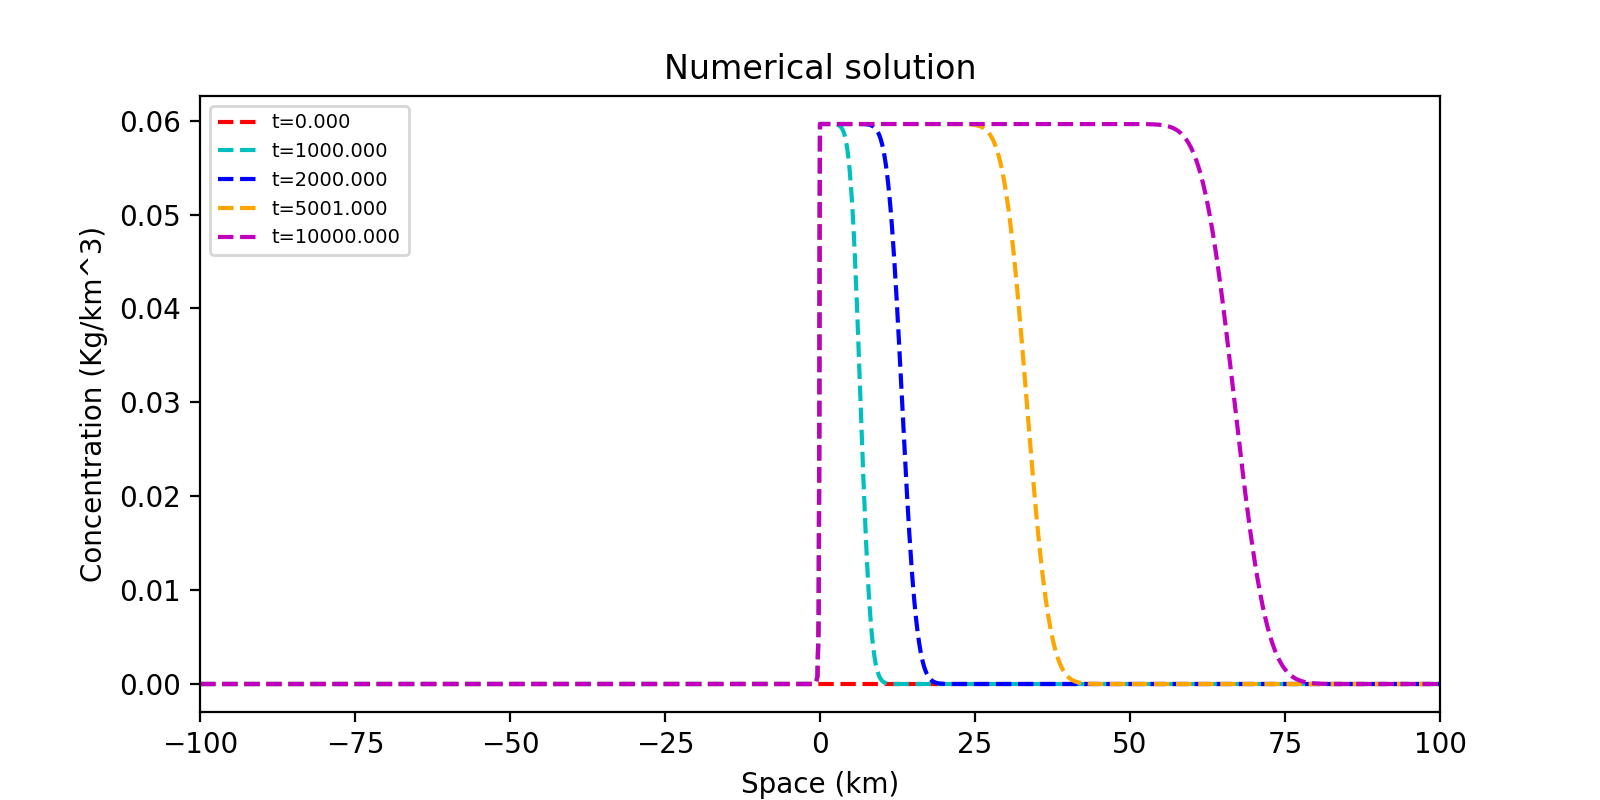

In [99]:
plotting(U,L,sig,T,Nt_gaps,Nx_spaces,v,D)
plt.savefig("source1.pdf")

<IPython.core.display.Javascript object>


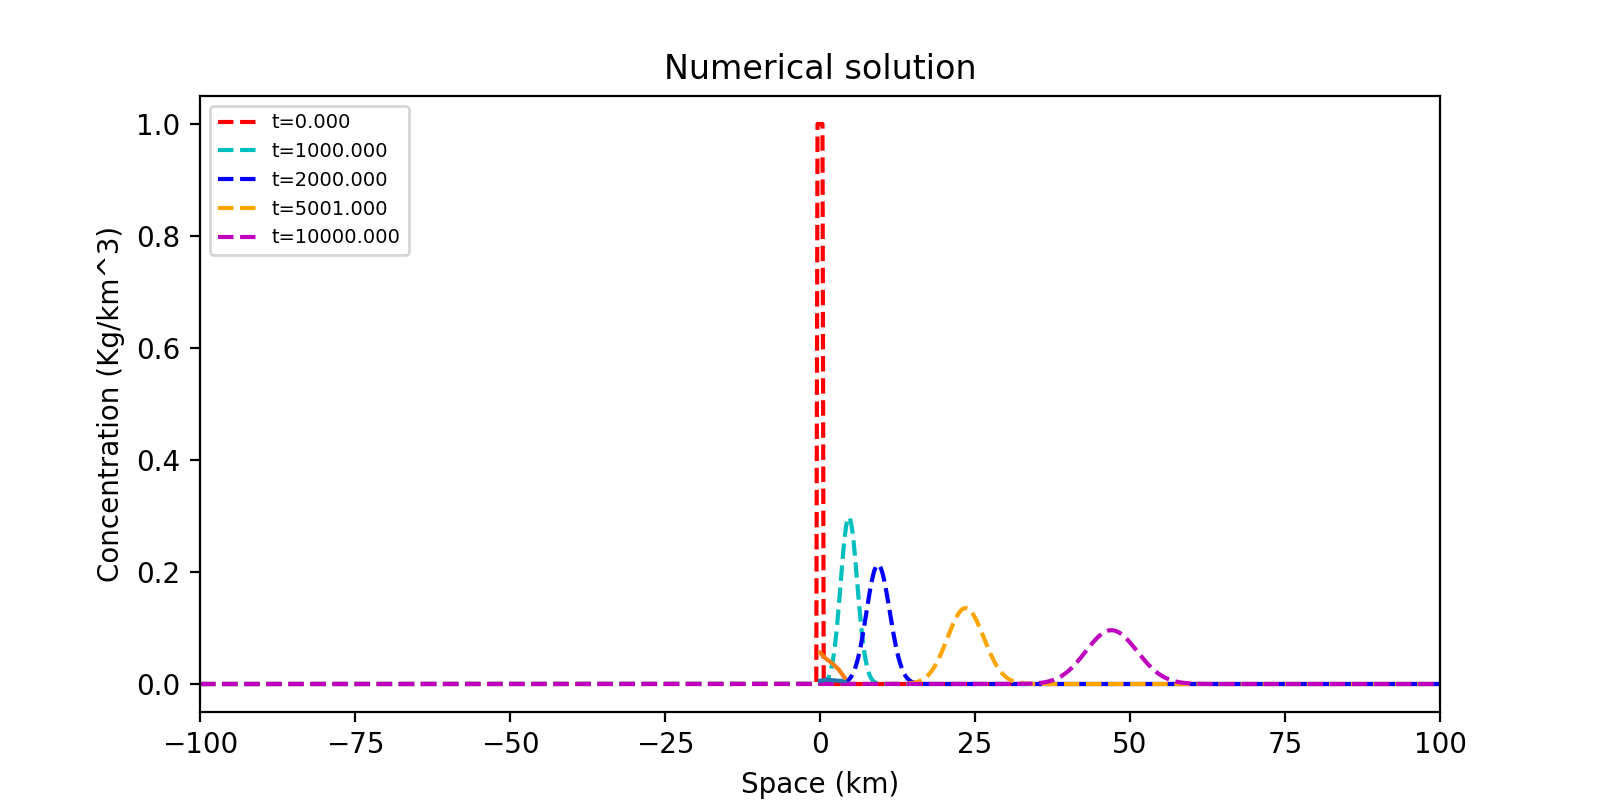

In [73]:
Nt_gaps,T,Nx_spaces,L,v,I,sig,D,S = 20000, 10000, 1000, 100, 0.0047056, I, 1,0.000864,0
#T = 5000s, L = 40km,, v=0.0067056km/s = 15mi/h, D= 0.000864km^2/s=0.24cm^2/s 
U1 = U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D,S)
plotting(U1,L,sig,T,Nt_gaps,Nx_spaces,v,D)

In [74]:
U_at_70 = np.amax(U[:, -1]) # source
U1_at_70 = np.amax(U1[:, -1]) #no sourse
U1_at_70-U_at_70

0.01107108842402603

<IPython.core.display.Javascript object>


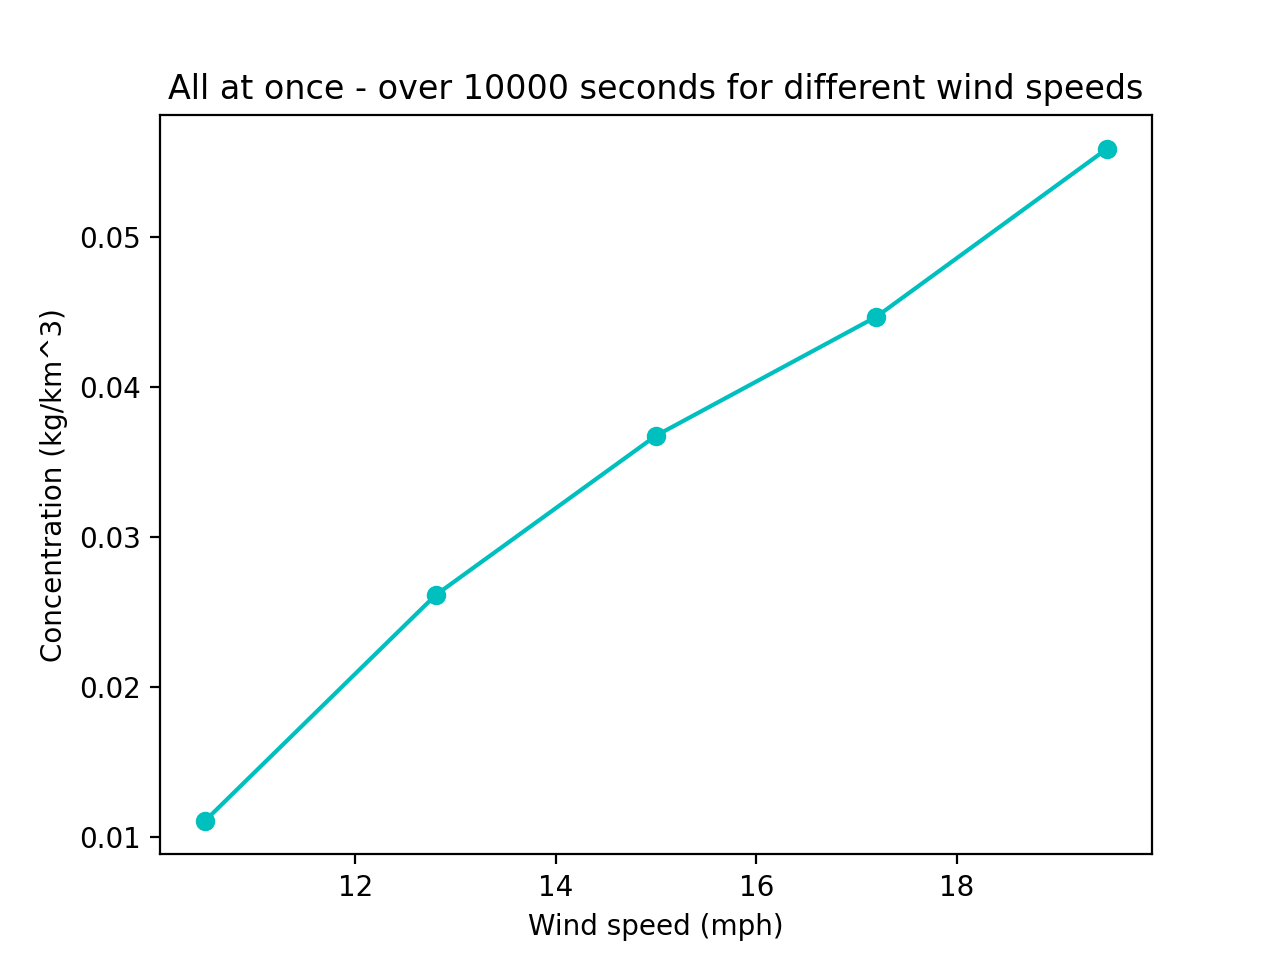

In [96]:
x = [19.5, 17.2, 15, 12.8, 10.5]
#x = [0.0087056,0.0077056, 0.0067056, 0.0057056, 0.0047056] # wind speed
y = [0.05586, 0.04467,0.03674, 0.02611, 0.01107] # no source - source
plt.plot(x,y, "o-", color = 'c')
plt.xlabel("Wind speed (mph)")
plt.ylabel("Concentration (kg/km^3)")
plt.title("All at once - over 10000 seconds for different wind speeds")
plt.savefig("source.pdf")
plt.show()